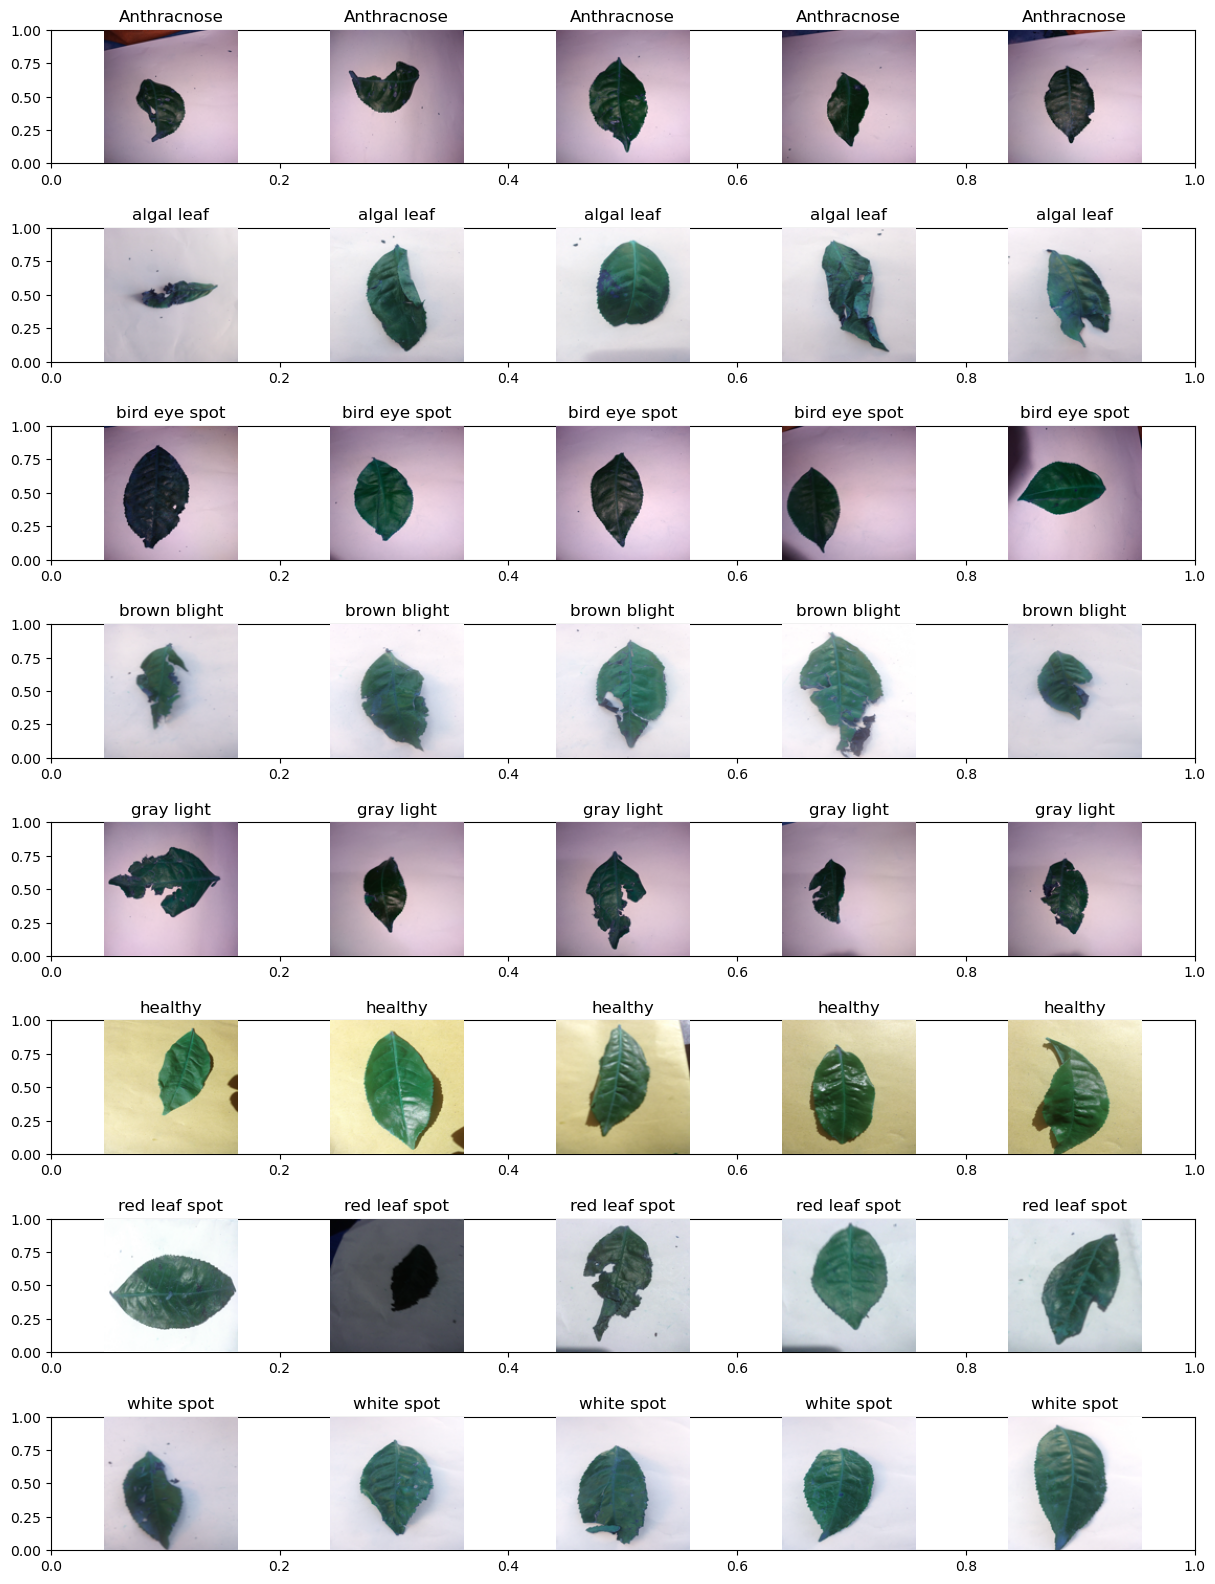

In [19]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# Load images and labels
training_path = "C:\\Users\\USER\\OneDrive\\Desktop\\Mtech\\Mini\\TEA\\tea sickness dataset"
labels = ["Anthracnose", "algal leaf", "bird eye spot", "brown blight", "gray light", "healthy", "red leaf spot", "white spot"]
x = []
y = []

# Collecting images and labels
for index, label in enumerate(labels):
    eff_dir = os.listdir(os.path.join(training_path, label))
    for img_name in eff_dir:
        image = cv2.imread(os.path.join(training_path, label, img_name))
        if image is not None:  # Ensure the image was loaded correctly
            image = Image.fromarray(image, 'RGB')
            image = image.resize((128, 128))
            x.append(np.array(image))
            y.append(index)

x = np.array(x)
y = np.array(y)

# Plotting images by categories
num_categories = len(labels)
num_images_per_category = 5  # Number of images to display per category
plt.figure(figsize=(12, 2 * num_categories))

for i, label in enumerate(labels):
    plt.subplot(num_categories, 1, i + 1)  # One row for each label
    category_indices = np.where(y == i)[0]  # Get indices of images for this category
    for j in range(min(num_images_per_category, len(category_indices))):
        plt.subplot(num_categories, num_images_per_category, i * num_images_per_category + j + 1)
        plt.imshow(x[category_indices[j]])  # Show the image
        plt.title(label)  # Set the title as the label
        plt.axis('off')  # Turn off axes

plt.tight_layout()
plt.show()


## RANDOM FOREST

Accuracy: 0.81
               precision    recall  f1-score   support

  Anthracnose       0.56      0.69      0.62        26
   algal leaf       0.94      0.94      0.94        17
bird eye spot       0.71      0.44      0.55        27
 brown blight       0.89      0.84      0.86        19
   gray light       0.70      0.84      0.76        25
      healthy       1.00      0.94      0.97        16
red leaf spot       0.96      1.00      0.98        24
   white spot       0.91      0.91      0.91        23

     accuracy                           0.81       177
    macro avg       0.83      0.83      0.82       177
 weighted avg       0.81      0.81      0.80       177



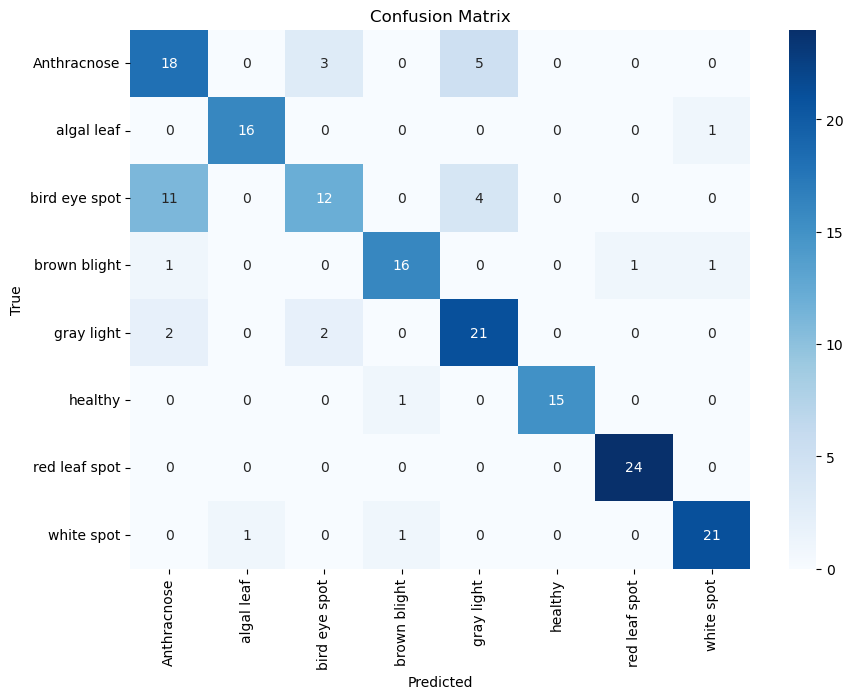

In [21]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Path to the dataset
training_path = "C:\\Users\\USER\\OneDrive\\Desktop\\Mtech\\Mini\\TEA\\tea sickness dataset"
labels = ["Anthracnose", "algal leaf", "bird eye spot", "brown blight", 
          "gray light", "healthy", "red leaf spot", "white spot"]

# Load images and labels
x = []
y = []
for index, label in enumerate(labels):
    eff_dir = os.listdir(os.path.join(training_path, label))
    for img_name in eff_dir:
        image = cv2.imread(os.path.join(training_path, label, img_name))
        image = cv2.resize(image, (128, 128))  # Resize image to 128x128
        x.append(image)
        y.append(label)

# Convert lists to numpy arrays
x = np.array(x)
y = np.array(y)

# Flatten the images for the classifier
x = x.reshape(x.shape[0], -1)  # Reshape to (num_samples, 128*128*3)

# Encode the labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

# Create and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## KNN

KNN Classifier:
Accuracy: 0.58
               precision    recall  f1-score   support

  Anthracnose       0.53      0.65      0.59        26
   algal leaf       0.33      0.18      0.23        17
bird eye spot       0.52      0.48      0.50        27
 brown blight       0.46      0.84      0.59        19
   gray light       0.62      0.52      0.57        25
      healthy       1.00      1.00      1.00        16
red leaf spot       1.00      0.38      0.55        24
   white spot       0.53      0.70      0.60        23

     accuracy                           0.58       177
    macro avg       0.62      0.59      0.58       177
 weighted avg       0.62      0.58      0.57       177



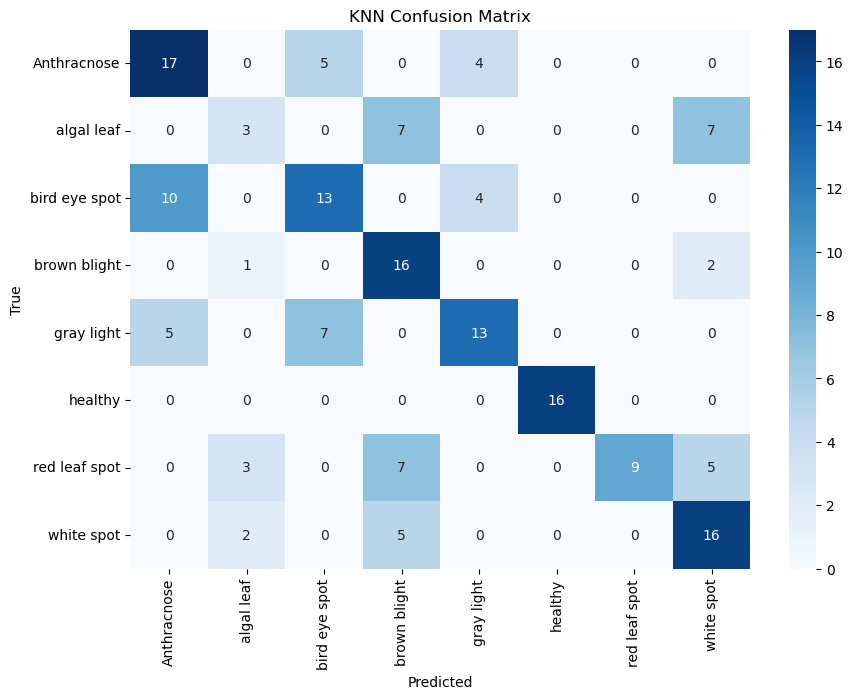

In [23]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Path to the dataset
training_path = "C:\\Users\\USER\\OneDrive\\Desktop\\Mtech\\Mini\\TEA\\tea sickness dataset"
labels = ["Anthracnose", "algal leaf", "bird eye spot", "brown blight", 
          "gray light", "healthy", "red leaf spot", "white spot"]

# Load images and labels
x = []
y = []
for index, label in enumerate(labels):
    eff_dir = os.listdir(os.path.join(training_path, label))
    for img_name in eff_dir:
        image = cv2.imread(os.path.join(training_path, label, img_name))
        image = cv2.resize(image, (128, 128))  # Resize image to 128x128
        x.append(image)
        y.append(label)

# Convert lists to numpy arrays
x = np.array(x)
y = np.array(y)

# Flatten the images for the classifier
x = x.reshape(x.shape[0], -1)  # Reshape to (num_samples, 128*128*3)

# Encode the labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

# Initialize and train KNN classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions and evaluate
knn_pred = knn.predict(X_test)
print("KNN Classifier:")
print(f"Accuracy: {accuracy_score(y_test, knn_pred):.2f}")
print(classification_report(y_test, knn_pred, target_names=le.classes_))

# Confusion matrix
conf_matrix_knn = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## SVM

SVM Classifier:
Accuracy: 0.75
               precision    recall  f1-score   support

  Anthracnose       0.56      0.69      0.62        26
   algal leaf       0.83      0.88      0.86        17
bird eye spot       0.58      0.52      0.55        27
 brown blight       0.81      0.68      0.74        19
   gray light       0.65      0.60      0.62        25
      healthy       1.00      0.94      0.97        16
red leaf spot       0.96      0.96      0.96        24
   white spot       0.80      0.87      0.83        23

     accuracy                           0.75       177
    macro avg       0.78      0.77      0.77       177
 weighted avg       0.76      0.75      0.75       177



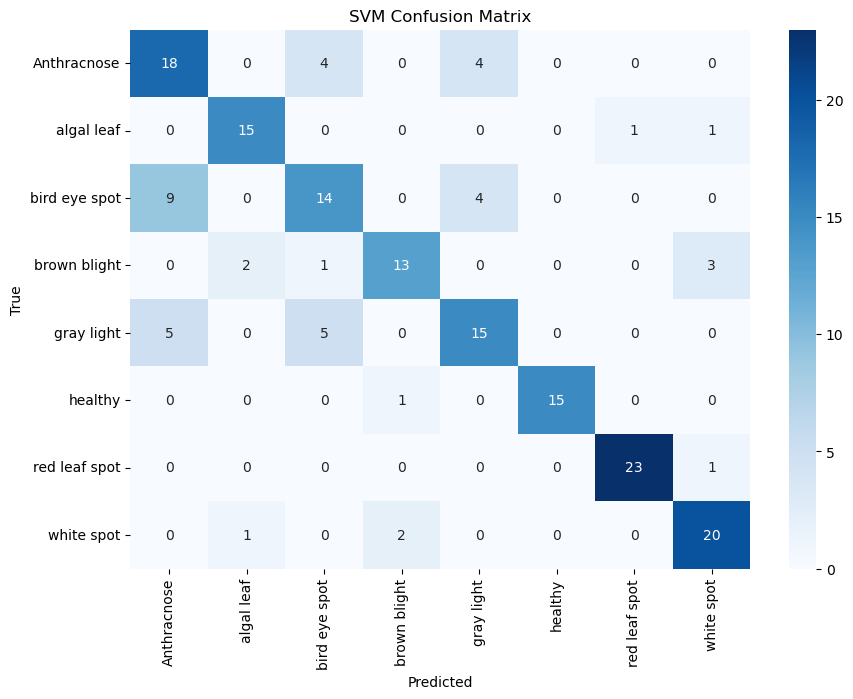

In [25]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Path to the dataset
training_path = "C:\\Users\\USER\\OneDrive\\Desktop\\Mtech\\Mini\\TEA\\tea sickness dataset"
labels = ["Anthracnose", "algal leaf", "bird eye spot", "brown blight", 
          "gray light", "healthy", "red leaf spot", "white spot"]

# Load images and labels
x = []
y = []
for index, label in enumerate(labels):
    eff_dir = os.listdir(os.path.join(training_path, label))
    for img_name in eff_dir:
        image = cv2.imread(os.path.join(training_path, label, img_name))
        image = cv2.resize(image, (128, 128))  # Resize image to 128x128
        x.append(image)
        y.append(label)

# Convert lists to numpy arrays
x = np.array(x)
y = np.array(y)

# Flatten the images for the classifier
x = x.reshape(x.shape[0], -1)  # Reshape to (num_samples, 128*128*3)

# Encode the labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

# Initialize and train SVM classifier
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=42)  # You can try different kernels
svm.fit(X_train, y_train)

# Make predictions and evaluate
svm_pred = svm.predict(X_test)
print("SVM Classifier:")
print(f"Accuracy: {accuracy_score(y_test, svm_pred):.2f}")
print(classification_report(y_test, svm_pred, target_names=le.classes_))

# Confusion matrix
conf_matrix_svm = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
